# Double Jet

With various grid sizes

In [28]:
from gpuocean.SWEsimulators import ModelErrorKL, CDKLM16
from gpuocean.utils import Common, IPythonMagic

from importlib import reload

import numpy as np
import copy
import pycuda.driver as cuda
from matplotlib import pyplot as plt

plt.rcParams["lines.color"] = "k"
plt.rcParams["text.color"] = "k"
plt.rcParams["axes.labelcolor"] = "k"
plt.rcParams["xtick.color"] = "k"
plt.rcParams["ytick.color"] = "k"

plt.rcParams["image.origin"] = "lower"


In [2]:
%cuda_context_handler gpu_ctx

In [3]:
gpu_stream = cuda.Stream()

In [4]:
import sys, os
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../')))

Get initial arguments from class

In [5]:
from gpuocean.utils import DoubleJetCase

In [6]:
doubleJetCase = DoubleJetCase.DoubleJetCase(gpu_ctx, DoubleJetCase.DoubleJetPerturbationType.SteadyState, ny=256, nx=512)
doubleJetCase_args, doubleJetCase_init, _ = doubleJetCase.getInitConditions()

## Truth

In [7]:
from gpuocean.utils import Observation, DrifterPlotHelper

In [8]:
truth_path = "/home/florianb/havvarsel/multilevelDA/doublejet/scripts/DataAssimilation/DoubleJetTruth/2023-09-15T15_08_08"

true_trajectories = Observation.Observation(domain_size_x=doubleJetCase_args["nx"]*doubleJetCase_args["dx"],
                                            domain_size_y=doubleJetCase_args["ny"]*doubleJetCase_args["dy"], 
                                            nx=doubleJetCase_args["nx"], ny=doubleJetCase_args["ny"])

true_trajectories.read_pickle(os.path.join(truth_path, "truth_trajectories.pickle"))

In [9]:
true_trajectories.get_num_drifters()

100

## Ensemble drifter

In [10]:
ls = [7, 8]

In [11]:
from gpuocean.utils import DoubleJetCase

args_list = []
init_list = []

for l in ls:
    doubleJetCase = DoubleJetCase.DoubleJetCase(gpu_ctx, DoubleJetCase.DoubleJetPerturbationType.SteadyState, ny=2**l, nx=2**(l+1))
    doubleJetCase_args, doubleJetCase_init, _ = doubleJetCase.getInitConditions()

    args_list.append(doubleJetCase_args)
    init_list.append(doubleJetCase_init)

### Load Ensemble

In [12]:
source_path = "/home/florianb/havvarsel/multilevelDA/doublejet/scripts/DataAssimilation/MLDA/2023-09-19T14_10_37ls87"

In [13]:
mlda_drifter60_path = os.path.join(source_path, "mldrifters_60")

mlda_trajectories60 = []
for f in os.listdir(mlda_drifter60_path):
    trajectory = Observation.Observation(domain_size_x=doubleJetCase_args["nx"]*doubleJetCase_args["dx"],
                                            domain_size_y=doubleJetCase_args["ny"]*doubleJetCase_args["dy"], 
                                            nx=doubleJetCase_args["nx"], ny=doubleJetCase_args["ny"])

    trajectory.read_pickle(os.path.join(mlda_drifter60_path,f))
    
    mlda_trajectories60.append(trajectory)

In [14]:
mlda_drifter300_path = os.path.join(source_path, "mldrifters_300")

mlda_trajectories300 = []
for f in os.listdir(mlda_drifter300_path):
    trajectory = Observation.Observation(domain_size_x=doubleJetCase_args["nx"]*doubleJetCase_args["dx"],
                                            domain_size_y=doubleJetCase_args["ny"]*doubleJetCase_args["dy"], 
                                            nx=doubleJetCase_args["nx"], ny=doubleJetCase_args["ny"])

    trajectory.read_pickle(os.path.join(mlda_drifter300_path,f))
    
    mlda_trajectories300.append(trajectory)

In [15]:
mlda_drifter900_path = os.path.join(source_path, "mldrifters_900")

mlda_trajectories900 = []
for f in os.listdir(mlda_drifter900_path):
    trajectory = Observation.Observation(domain_size_x=doubleJetCase_args["nx"]*doubleJetCase_args["dx"],
                                            domain_size_y=doubleJetCase_args["ny"]*doubleJetCase_args["dy"], 
                                            nx=doubleJetCase_args["nx"], ny=doubleJetCase_args["ny"])

    trajectory.read_pickle(os.path.join(mlda_drifter900_path,f))
    
    mlda_trajectories900.append(trajectory)

In [16]:
mlda_drifter1800_path = os.path.join(source_path, "mldrifters_1800")

mlda_trajectories1800 = []
for f in os.listdir(mlda_drifter1800_path):
    trajectory = Observation.Observation(domain_size_x=doubleJetCase_args["nx"]*doubleJetCase_args["dx"],
                                            domain_size_y=doubleJetCase_args["ny"]*doubleJetCase_args["dy"], 
                                            nx=doubleJetCase_args["nx"], ny=doubleJetCase_args["ny"])

    trajectory.read_pickle(os.path.join(mlda_drifter1800_path,f))
    
    mlda_trajectories1800.append(trajectory)

In [17]:
mlda_drifter3600_path = os.path.join(source_path, "mldrifters_3600")

mlda_trajectories3600 = []
for f in os.listdir(mlda_drifter3600_path):
    trajectory = Observation.Observation(domain_size_x=doubleJetCase_args["nx"]*doubleJetCase_args["dx"],
                                            domain_size_y=doubleJetCase_args["ny"]*doubleJetCase_args["dy"], 
                                            nx=doubleJetCase_args["nx"], ny=doubleJetCase_args["ny"])

    trajectory.read_pickle(os.path.join(mlda_drifter3600_path,f))
    
    mlda_trajectories3600.append(trajectory)

In [18]:
mlda_drifter10800_path = os.path.join(source_path, "mldrifters_10800")

mlda_trajectories10800 = []
for f in os.listdir(mlda_drifter10800_path):
    trajectory = Observation.Observation(domain_size_x=doubleJetCase_args["nx"]*doubleJetCase_args["dx"],
                                            domain_size_y=doubleJetCase_args["ny"]*doubleJetCase_args["dy"], 
                                            nx=doubleJetCase_args["nx"], ny=doubleJetCase_args["ny"])

    trajectory.read_pickle(os.path.join(mlda_drifter10800_path,f))
    
    mlda_trajectories10800.append(trajectory)

In [19]:
mlda_drifter21600_path = os.path.join(source_path, "mldrifters_21600")

mlda_trajectories21600 = []
for f in os.listdir(mlda_drifter21600_path):
    trajectory = Observation.Observation(domain_size_x=doubleJetCase_args["nx"]*doubleJetCase_args["dx"],
                                            domain_size_y=doubleJetCase_args["ny"]*doubleJetCase_args["dy"], 
                                            nx=doubleJetCase_args["nx"], ny=doubleJetCase_args["ny"])

    trajectory.read_pickle(os.path.join(mlda_drifter21600_path,f))
    
    mlda_trajectories21600.append(trajectory)

In [20]:
mlda_drifter43200_path = os.path.join(source_path, "mldrifters_43200")

mlda_trajectories43200 = []
for f in os.listdir(mlda_drifter43200_path):
    trajectory = Observation.Observation(domain_size_x=doubleJetCase_args["nx"]*doubleJetCase_args["dx"],
                                            domain_size_y=doubleJetCase_args["ny"]*doubleJetCase_args["dy"], 
                                            nx=doubleJetCase_args["nx"], ny=doubleJetCase_args["ny"])

    trajectory.read_pickle(os.path.join(mlda_drifter43200_path,f))
    
    mlda_trajectories43200.append(trajectory)

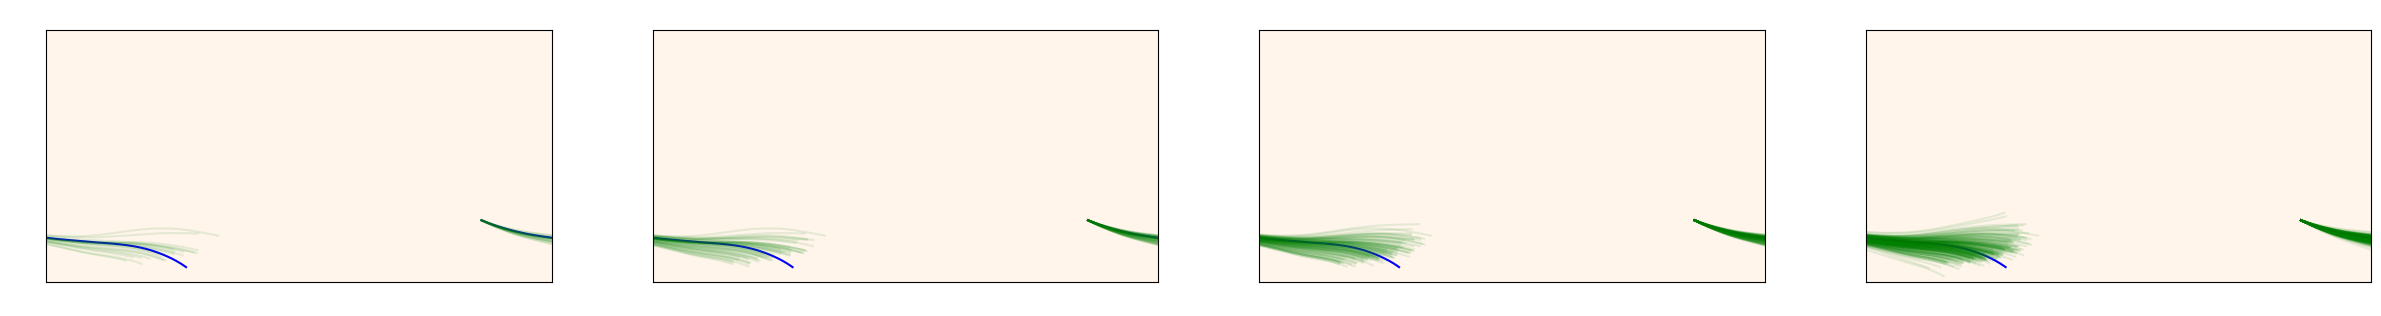

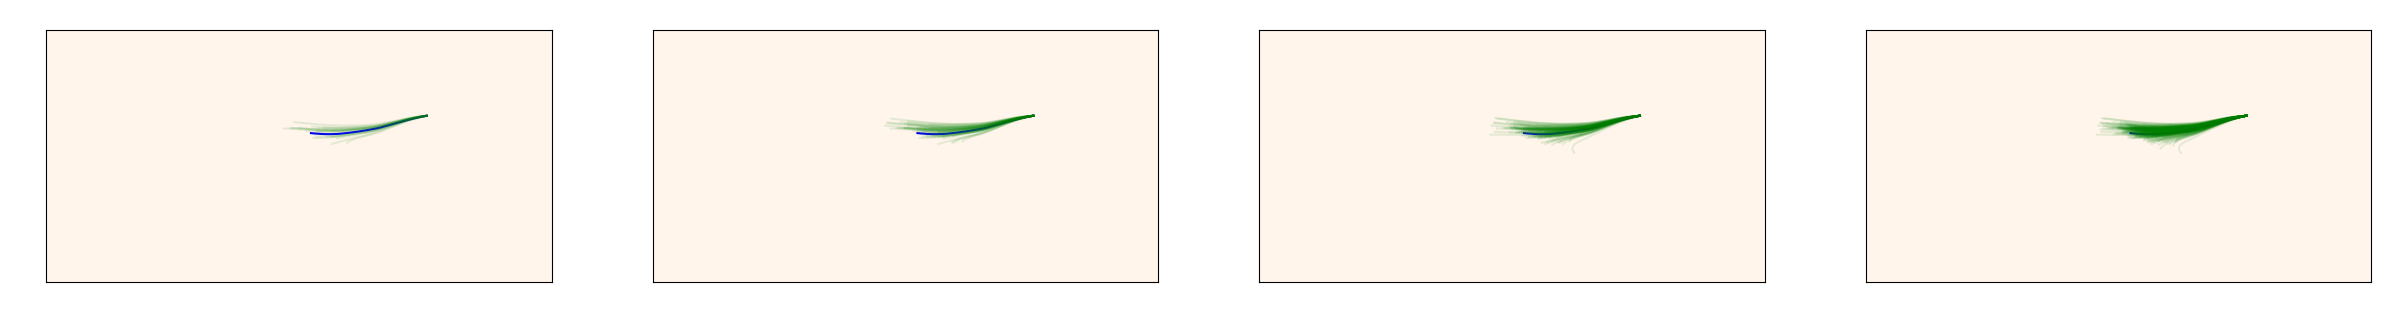

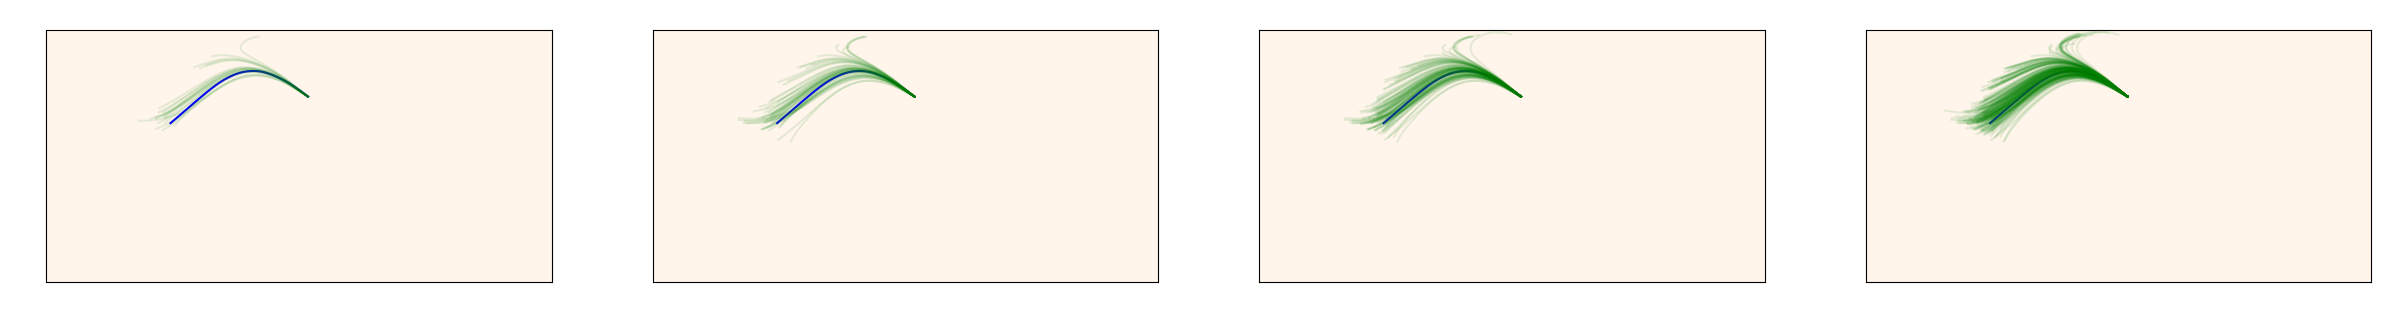

In [26]:
for d in range(3):

    fig, axs = plt.subplots(1,4, figsize=(30,10))
    axs[0].set_title("20 drifter")
    axs[1].set_title("50 drifter")
    axs[2].set_title("100 drifter")
    axs[3].set_title("200 drifter")

    for i in range(len(axs)):
        DrifterPlotHelper.background_from_grid_parameters(doubleJetCase_args["nx"], doubleJetCase_args["ny"], doubleJetCase_args["dx"], doubleJetCase_args["dy"], ax=axs[i])
        DrifterPlotHelper.add_drifter_on_background(axs[i], true_trajectories, drifter_id=d)

    DrifterPlotHelper.add_ensemble_drifter_on_background(axs[0], mlda_trajectories60[:20], drifter_id=d, color='Green', alpha=0.1)
    DrifterPlotHelper.add_ensemble_drifter_on_background(axs[1], mlda_trajectories60[:50], drifter_id=d, color='Green', alpha=0.1)
    DrifterPlotHelper.add_ensemble_drifter_on_background(axs[2], mlda_trajectories60[:100], drifter_id=d, color='Green', alpha=0.1)
    DrifterPlotHelper.add_ensemble_drifter_on_background(axs[3], mlda_trajectories60[:200], drifter_id=d, color='Green', alpha=0.1)

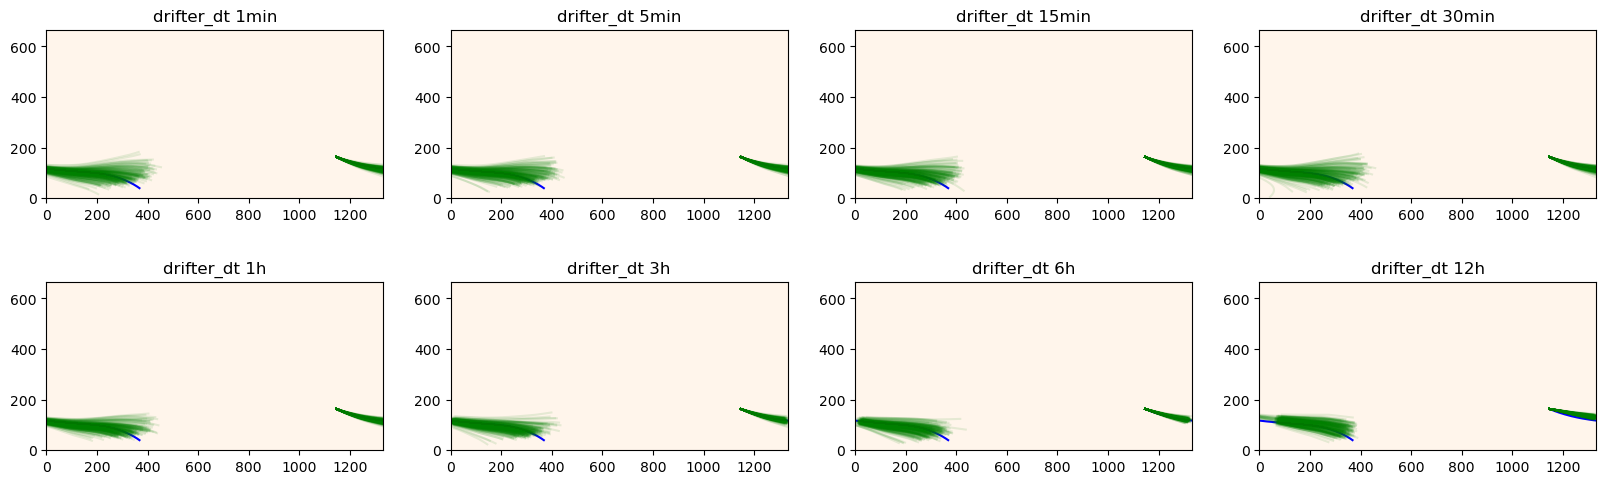

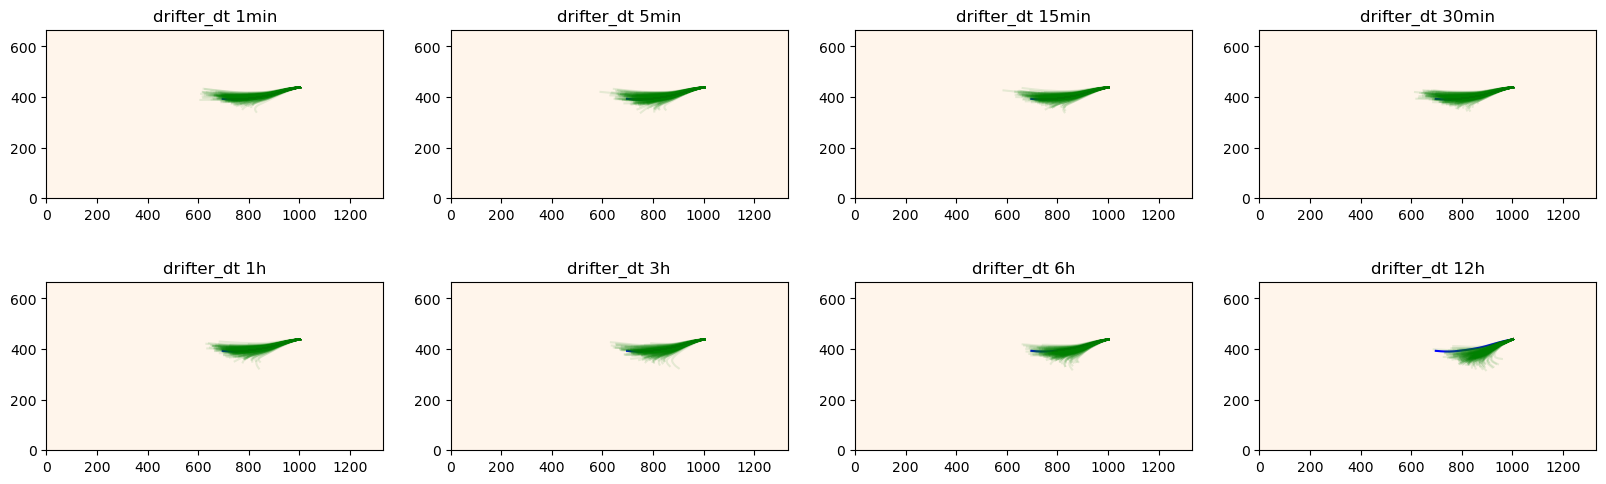

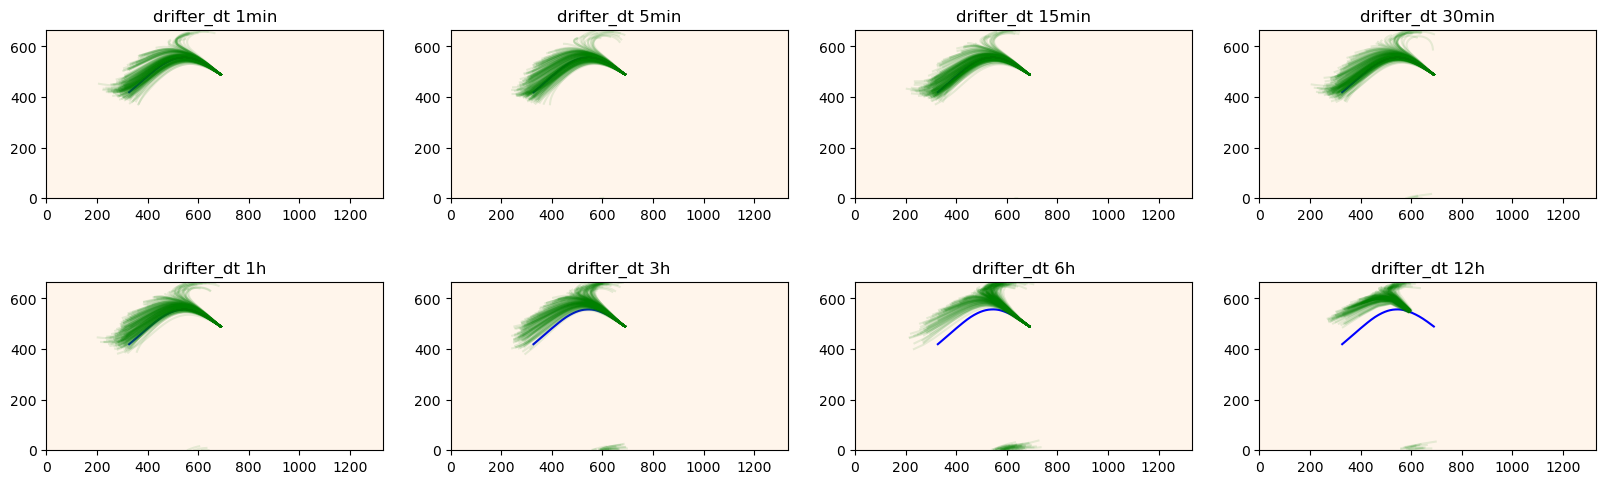

In [29]:
for d in range(3):

    fig, axs = plt.subplots(2,4, figsize=(20,6))
    axs[0,0].set_title("drifter_dt 1min")
    axs[0,1].set_title("drifter_dt 5min")
    axs[0,2].set_title("drifter_dt 15min")
    axs[0,3].set_title("drifter_dt 30min")

    axs[1,0].set_title("drifter_dt 1h")
    axs[1,1].set_title("drifter_dt 3h")
    axs[1,2].set_title("drifter_dt 6h")
    axs[1,3].set_title("drifter_dt 12h")

    for r in range(len(axs)):
        for c in range(len(axs[r])):
            DrifterPlotHelper.background_from_grid_parameters(doubleJetCase_args["nx"], doubleJetCase_args["ny"], doubleJetCase_args["dx"], doubleJetCase_args["dy"], ax=axs[r,c])
            DrifterPlotHelper.add_drifter_on_background(axs[r,c], true_trajectories, drifter_id=d)

    DrifterPlotHelper.add_ensemble_drifter_on_background(axs[0,0], mlda_trajectories60, drifter_id=d, color='Green', alpha=0.1)
    DrifterPlotHelper.add_ensemble_drifter_on_background(axs[0,1], mlda_trajectories300, drifter_id=d, color='Green', alpha=0.1)
    DrifterPlotHelper.add_ensemble_drifter_on_background(axs[0,2], mlda_trajectories900, drifter_id=d, color='Green', alpha=0.1)
    DrifterPlotHelper.add_ensemble_drifter_on_background(axs[0,3], mlda_trajectories1800, drifter_id=d, color='Green', alpha=0.1)

    DrifterPlotHelper.add_ensemble_drifter_on_background(axs[1,0], mlda_trajectories3600, drifter_id=d, color='Green', alpha=0.1)
    DrifterPlotHelper.add_ensemble_drifter_on_background(axs[1,1], mlda_trajectories10800, drifter_id=d, color='Green', alpha=0.1)
    DrifterPlotHelper.add_ensemble_drifter_on_background(axs[1,2], mlda_trajectories21600, drifter_id=d, color='Green', alpha=0.1)
    DrifterPlotHelper.add_ensemble_drifter_on_background(axs[1,3], mlda_trajectories43200, drifter_id=d, color='Green', alpha=0.1)

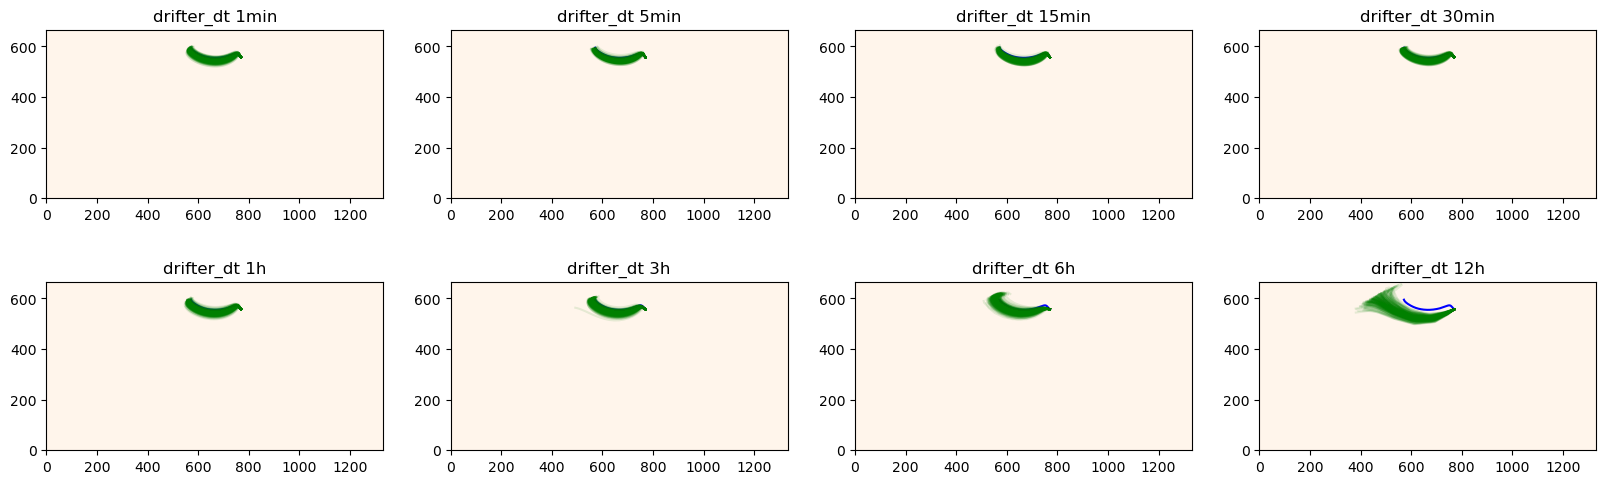

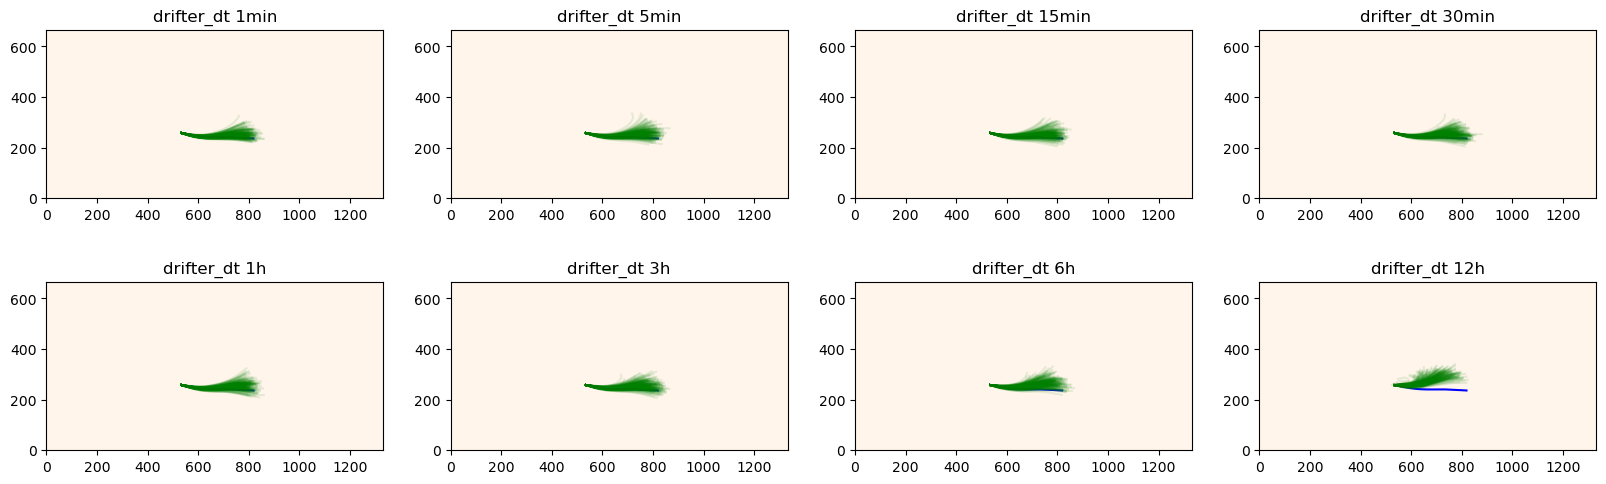

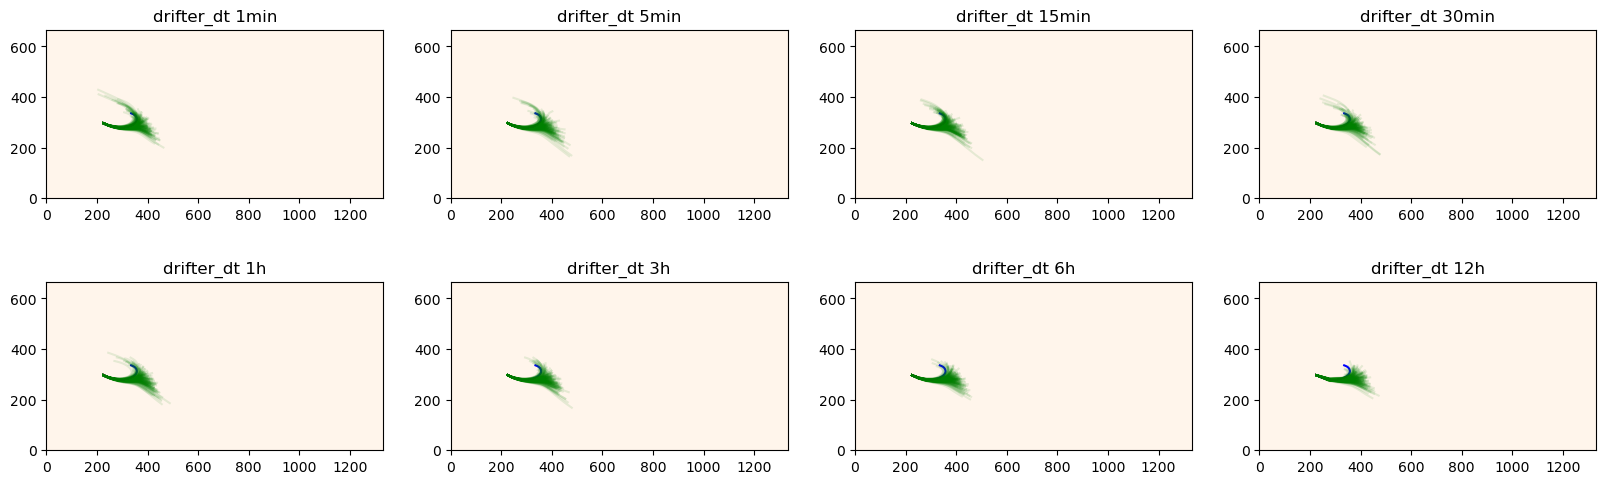

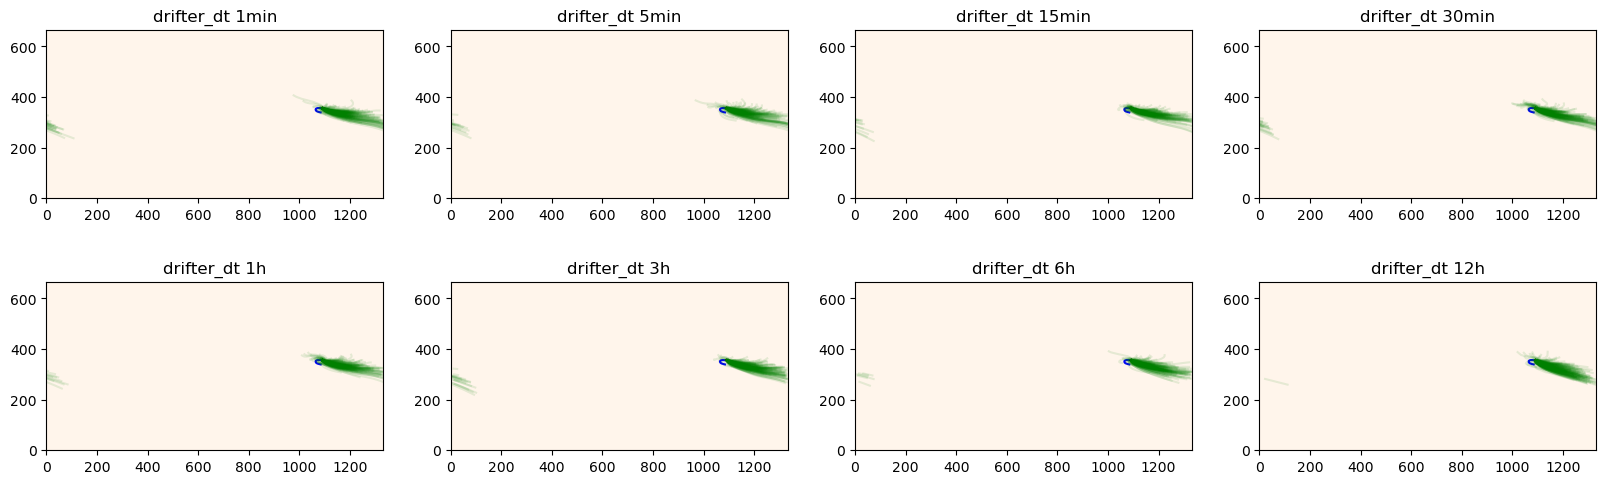

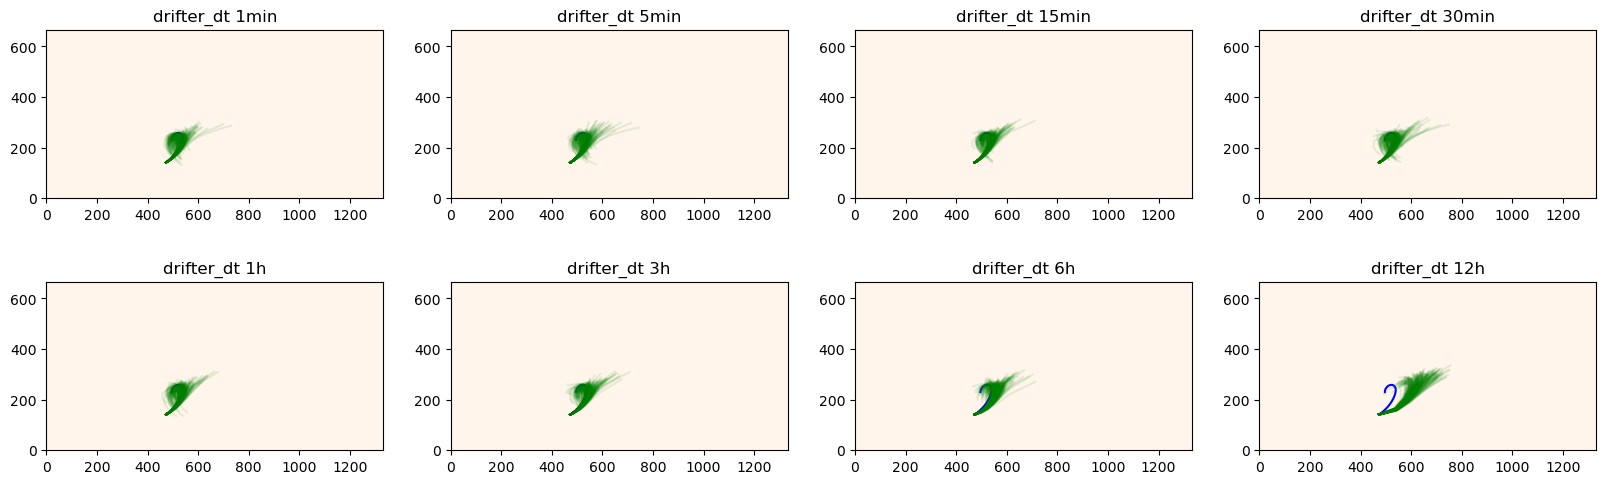

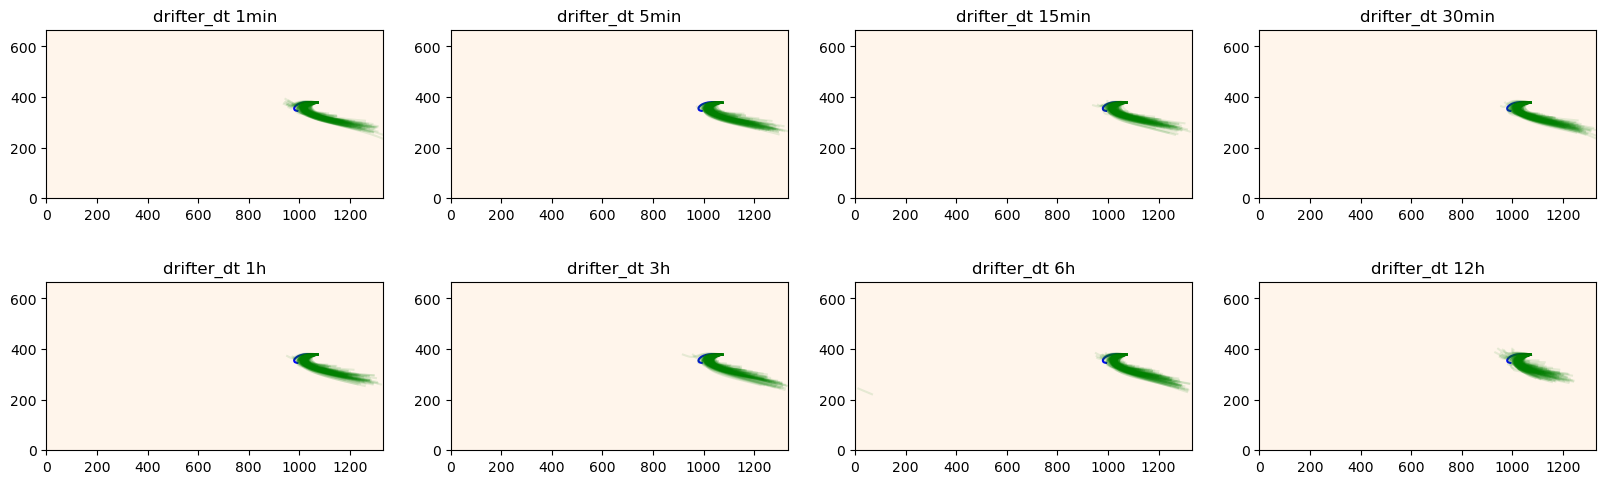

In [33]:
for d in [45, 47, 23, 24, 15, 13]:

    fig, axs = plt.subplots(2,4, figsize=(20,6))
    axs[0,0].set_title("drifter_dt 1min")
    axs[0,1].set_title("drifter_dt 5min")
    axs[0,2].set_title("drifter_dt 15min")
    axs[0,3].set_title("drifter_dt 30min")

    axs[1,0].set_title("drifter_dt 1h")
    axs[1,1].set_title("drifter_dt 3h")
    axs[1,2].set_title("drifter_dt 6h")
    axs[1,3].set_title("drifter_dt 12h")

    for r in range(len(axs)):
        for c in range(len(axs[r])):
            DrifterPlotHelper.background_from_grid_parameters(doubleJetCase_args["nx"], doubleJetCase_args["ny"], doubleJetCase_args["dx"], doubleJetCase_args["dy"], ax=axs[r,c])
            DrifterPlotHelper.add_drifter_on_background(axs[r,c], true_trajectories, drifter_id=d)

    DrifterPlotHelper.add_ensemble_drifter_on_background(axs[0,0], mlda_trajectories60, drifter_id=d, color='Green', alpha=0.1)
    DrifterPlotHelper.add_ensemble_drifter_on_background(axs[0,1], mlda_trajectories300, drifter_id=d, color='Green', alpha=0.1)
    DrifterPlotHelper.add_ensemble_drifter_on_background(axs[0,2], mlda_trajectories900, drifter_id=d, color='Green', alpha=0.1)
    DrifterPlotHelper.add_ensemble_drifter_on_background(axs[0,3], mlda_trajectories1800, drifter_id=d, color='Green', alpha=0.1)

    DrifterPlotHelper.add_ensemble_drifter_on_background(axs[1,0], mlda_trajectories3600, drifter_id=d, color='Green', alpha=0.1)
    DrifterPlotHelper.add_ensemble_drifter_on_background(axs[1,1], mlda_trajectories10800, drifter_id=d, color='Green', alpha=0.1)
    DrifterPlotHelper.add_ensemble_drifter_on_background(axs[1,2], mlda_trajectories21600, drifter_id=d, color='Green', alpha=0.1)
    DrifterPlotHelper.add_ensemble_drifter_on_background(axs[1,3], mlda_trajectories43200, drifter_id=d, color='Green', alpha=0.1)

### Checking error in mean and standard deviations for different values of drifter $\Delta t$

In [126]:

def drifter_statistics(ensemble_obs, true_trajectories):

    width  = ensemble_obs[0].domain_size_x/1000
    height = ensemble_obs[0].domain_size_y/1000

    def center_around_true_postion(true_position, last_positions, width, height):
        centered_positions = last_positions - true_position
        centered_positions[:,0][centered_positions[:,0] < -0.5*width ] = centered_positions[:,0][centered_positions[:,0] < -0.5*width ] + width
        centered_positions[:,0][centered_positions[:,0] > +0.5*width ] = centered_positions[:,0][centered_positions[:,0] > +0.5*width ] - width
        centered_positions[:,1][centered_positions[:,1] < -0.5*height] = centered_positions[:,1][centered_positions[:,1] < -0.5*height] + height
        centered_positions[:,1][centered_positions[:,1] > +0.5*height] = centered_positions[:,1][centered_positions[:,1] > +0.5*height] - height

        return centered_positions

    num_ens_t =  len(ensemble_obs[0].obs_df["time"].iloc[1:])
    num_true_t = len(true_trajectories.obs_df["time"].iloc[0:])

    max_num_t = 37
    num_t = min(max_num_t, min(num_ens_t, num_true_t))

    drifter_t = np.zeros(num_t)
    if num_t > max_num_t-1:
        # Read t from truth
        # 37 times across 3 days --> 2 hours = 24*5 min inbetween
        for t_idx in range(max_num_t):
            drifter_t[t_idx] = true_trajectories.obs_df["time"].iloc[24*t_idx]
    else:
        # Read t from ensemble obs
        for t_idx in range(num_t):
            drifter_t[t_idx] = ensemble_obs[0].obs_df["time"].iloc[t_idx + 1]

    print(drifter_t/(3600*24))

    drifter_rmses = np.zeros(num_t)
    drifter_stds  = np.zeros(num_t)

    for t_idx in range(num_t):
        print("t_idx", t_idx)

        rmse_t = 0.0
        std_t  = 0.0

        for drifter_id in range(100):
            true_position = true_trajectories.get_drifter_path(drifter_id, 0, drifter_t[t_idx])[-1][-1]

            ## Get last postions
            numTrajectories = len(ensemble_obs)

            last_positions = np.zeros((numTrajectories,2))
            for d in range(numTrajectories):
                last_positions[d] = ensemble_obs[d].get_drifter_path(drifter_id, 0, drifter_t[t_idx])[-1][-1]
            last_positions = last_positions[~np.isnan(last_positions)].reshape(-1,2)

            centered_positions = center_around_true_postion(true_position, last_positions, width, height)

            rmse_t += 1/100 * np.sqrt(np.sum(np.mean(centered_positions, axis=0)**2)) # truth is at [0,0] after centering
            std_t  += 1/100 * np.sqrt(np.sum(np.std(centered_positions, axis=0, ddof=1)**2))

        drifter_rmses[t_idx] = rmse_t
        drifter_stds [t_idx] = std_t

    return drifter_rmses, drifter_stds, drifter_t/(3600*24)

In [137]:
stats_300   = drifter_statistics(mlda_trajectories300,   true_trajectories)
stats_1800  = drifter_statistics(mlda_trajectories1800,  true_trajectories)
stats_10800 = drifter_statistics(mlda_trajectories10800, true_trajectories)
stats_21600 = drifter_statistics(mlda_trajectories21600, true_trajectories)


[10.         10.08333333 10.16666667 10.25       10.33333333 10.41666667
 10.5        10.58333333 10.66666667 10.75       10.83333333 10.91666667
 11.         11.08333333 11.16666667 11.25       11.33333333 11.41666667
 11.5        11.58333333 11.66666667 11.75       11.83333333 11.91666667
 12.         12.08333333 12.16666667 12.25       12.33333333 12.41666667
 12.5        12.58333333 12.66666667 12.75       12.83333333 12.91666667
 13.        ]
t_idx 0
t_idx 1
t_idx 2
t_idx 3
t_idx 4
t_idx 5
t_idx 6
t_idx 7
t_idx 8
t_idx 9
t_idx 10
t_idx 11
t_idx 12
t_idx 13
t_idx 14
t_idx 15
t_idx 16
t_idx 17
t_idx 18
t_idx 19
t_idx 20
t_idx 21
t_idx 22
t_idx 23
t_idx 24
t_idx 25
t_idx 26
t_idx 27
t_idx 28
t_idx 29
t_idx 30
t_idx 31
t_idx 32
t_idx 33
t_idx 34
t_idx 35
t_idx 36
[10.         10.08333333 10.16666667 10.25       10.33333333 10.41666667
 10.5        10.58333333 10.66666667 10.75       10.83333333 10.91666667
 11.         11.08333333 11.16666667 11.25       11.33333333 11.41666667
 11.5 

In [128]:
stats_60    = drifter_statistics(mlda_trajectories60,    true_trajectories)
# stats_300   = drifter_statistics(mlda_trajectories300,   true_trajectories)
stats_900   = drifter_statistics(mlda_trajectories900,   true_trajectories)
# stats_1800  = drifter_statistics(mlda_trajectories1800,  true_trajectories)
stats_3600  = drifter_statistics(mlda_trajectories3600,  true_trajectories)
# stats_10800 = drifter_statistics(mlda_trajectories10800, true_trajectories)
# stats_21600 = drifter_statistics(mlda_trajectories21600, true_trajectories)
stats_43200 = drifter_statistics(mlda_trajectories43200, true_trajectories)


[10.         10.08333333 10.16666667 10.25       10.33333333 10.41666667
 10.5        10.58333333 10.66666667 10.75       10.83333333 10.91666667
 11.         11.08333333 11.16666667 11.25       11.33333333 11.41666667
 11.5        11.58333333 11.66666667 11.75       11.83333333 11.91666667
 12.         12.08333333 12.16666667 12.25       12.33333333 12.41666667
 12.5        12.58333333 12.66666667 12.75       12.83333333 12.91666667
 13.        ]
t_idx 0
t_idx 1
t_idx 2
t_idx 3
t_idx 4
t_idx 5
t_idx 6
t_idx 7
t_idx 8
t_idx 9
t_idx 10
t_idx 11
t_idx 12
t_idx 13
t_idx 14
t_idx 15
t_idx 16
t_idx 17
t_idx 18
t_idx 19
t_idx 20
t_idx 21
t_idx 22
t_idx 23
t_idx 24
t_idx 25
t_idx 26
t_idx 27
t_idx 28
t_idx 29
t_idx 30
t_idx 31
t_idx 32
t_idx 33
t_idx 34
t_idx 35
t_idx 36
[10.         10.08333333 10.16666667 10.25       10.33333333 10.41666667
 10.5        10.58333333 10.66666667 10.75       10.83333333 10.91666667
 11.         11.08333333 11.16666667 11.25       11.33333333 11.41666667
 11.5 

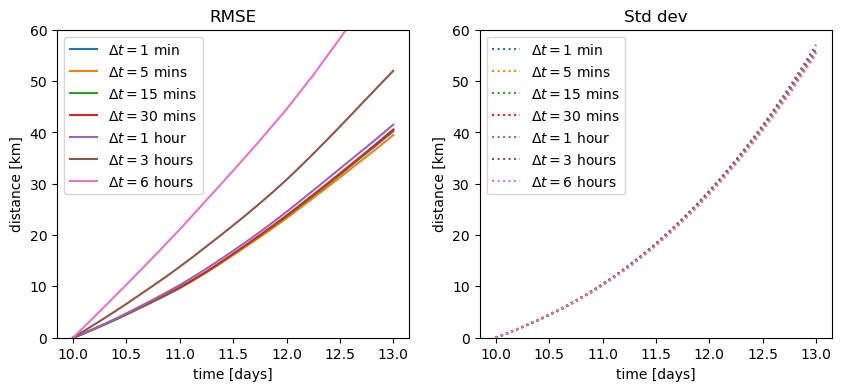

In [156]:

fig, ax = plt.subplots(1,2, figsize=(10, 4))

ax[0].plot(stats_60[2], stats_60[0], label = "$\Delta t = 1$ min")
ax[1].plot(stats_60[2], stats_60[1], ls="dotted", label = "$\Delta t = 1$ min")

ax[0].plot(stats_300[2], stats_300[0], label = "$\Delta t = 5$ mins")
ax[1].plot(stats_300[2], stats_300[1], ls="dotted", label = "$\Delta t = 5$ mins")

ax[0].plot(stats_900[2], stats_900[0], label = "$\Delta t = 15$ mins")
ax[1].plot(stats_900[2], stats_900[1], ls="dotted", label = "$\Delta t = 15$ mins")

ax[0].plot(stats_1800[2], stats_1800[0], label = "$\Delta t = 30$ mins")
ax[1].plot(stats_1800[2], stats_1800[1], ls="dotted", label = "$\Delta t = 30$ mins")

ax[0].plot(stats_3600[2], stats_3600[0], label = "$\Delta t = 1$ hour")
ax[1].plot(stats_3600[2], stats_3600[1], ls="dotted", label = "$\Delta t = 1$ hour")

ax[0].plot(stats_10800[2], stats_10800[0], label = "$\Delta t = 3$ hours")
ax[1].plot(stats_10800[2], stats_10800[1], ls="dotted", label = "$\Delta t = 3$ hours")

ax[0].plot(stats_21600[2], stats_21600[0], label = "$\Delta t = 6$ hours")
ax[1].plot(stats_21600[2], stats_21600[1], ls="dotted", label = "$\Delta t = 6$ hours")

# ax[0].plot(stats_43200[2], stats_43200[0], label = "$\Delta t = 12$ hours")
# ax[1].plot(stats_43200[2], stats_43200[1], ls="dotted", label = "$\Delta t = 12$ hours")

ax[0].set_title("RMSE")
ax[1].set_title("Std dev")

ax[0].set_xlabel("time [days]")
ax[1].set_xlabel("time [days]")

ax[0].set_ylabel("distance [km]")
ax[1].set_ylabel("distance [km]")

ax[0].set_ylim([0, 60]) #115])
ax[1].set_ylim([0, 60]) #115])




ax[0].legend()
ax[1].legend()
